In [55]:
import os
from math import pi

from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

load_dotenv()

eng = create_engine(f"postgresql+psycopg2://{os.environ['PG_USER']}:{os.environ['PG_PASSWORD']}@{os.environ['PG_HOST']}:{os.environ['PG_PORT']}/{os.environ['PG_DATABASE']}")
conn = eng.connect()
sql = "select id, name, total, amenity, shop, leisure, public_transport, office from dbt.h3_r8_population_centers"
df = pd.read_sql(sql, conn)

In [58]:
df_largest = df.nlargest(2, 'total')
df_largest

,id,name,total,amenity,shop,leisure,public_transport,office
469,594,Toronto,45700.0,27757,3141,3565,11048,9
17,356,Montréal,35521.0,13007,1804,3318,17192,9


In [59]:
df_largest.iloc[0].drop(['id', 'name', 'total']).values.flatten().tolist()

[27757, 3141, 3565, 11048, 9]

[0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469, 0.0]

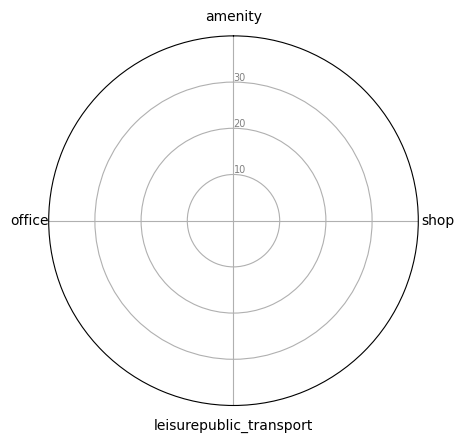

In [62]:
# reference: python-graph-gallery.com/391-radar-chart-with-several-individuals

# ------- PART 1: Create background

# number of variable
categories=['amenity', 'shop', 'leisure' 'public_transport', 'office']
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)


# ------- PART 2: Add plots

# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable

# Ind1
values=df_largest.iloc[0].drop(['id', 'name', 'total']).values.flatten().tolist()
# ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
# ax.fill(angles, values, 'b', alpha=0.1)
#
# # Ind2
# values=df_largest.iloc[1].drop(['id', 'name', 'total']).values.flatten().tolist()
# ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
# ax.fill(angles, values, 'b', alpha=0.1)
#
# # Add legend
# plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
#
# # Show the graph
# plt.show()